# EXAMEN 1 MOD2 REGRESIÓN LINEAL

## Importar

In [60]:
# %load basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',200)

In [61]:
## Conocer encoding de csv
liga = '/home/ef/Documents/Diplomado/EXAMEN02/'
import chardet
with open(liga + 'train_default.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [62]:
df = pd.read_csv(liga + 'train_default.csv',
                 encoding = 'ascii',
                 sep = '|',
                 low_memory = False)
df.sample(4)

,CUSTOMER_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
4378,3118,210000.0,1,1,2,33,1,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,700.0,0.0,0.0,0.0,0.0,700.0,0.0,0.0,1
4585,23759,310000.0,2,2,2,42,-2,-1,0,0,0,0,-2123.0,246407.0,250249.0,254254.0,259960.0,265702.0,260000.0,10000.0,10000.0,10000.0,10000.0,10000.0,0
4448,17415,150000.0,2,2,1,35,0,0,0,0,0,0,128278.0,131715.0,133625.0,49019.0,44801.0,39742.0,7000.0,6000.0,1800.0,1600.0,2000.0,1700.0,0
4629,20301,20000.0,2,2,1,37,0,0,0,0,0,0,19969.0,19568.0,19189.0,13708.0,11467.0,10614.0,1400.0,2000.0,1500.0,1000.0,1000.0,2000.0,0


In [63]:
df.rename(columns = {'PAY_0':'PAY_1',
                    'default.payment.next.month':'incumple'},
          inplace = True)
dim_antes = len(df)
df = df.iloc[:,1:].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  5625 non-null   float64
 1   SEX        5625 non-null   int64  
 2   EDUCATION  5625 non-null   int64  
 3   MARRIAGE   5625 non-null   int64  
 4   AGE        5625 non-null   int64  
 5   PAY_1      5625 non-null   int64  
 6   PAY_2      5625 non-null   int64  
 7   PAY_3      5625 non-null   int64  
 8   PAY_4      5625 non-null   int64  
 9   PAY_5      5625 non-null   int64  
 10  PAY_6      5625 non-null   int64  
 11  BILL_AMT1  5625 non-null   float64
 12  BILL_AMT2  5625 non-null   float64
 13  BILL_AMT3  5625 non-null   float64
 14  BILL_AMT4  5625 non-null   float64
 15  BILL_AMT5  5625 non-null   float64
 16  BILL_AMT6  5625 non-null   float64
 17  PAY_AMT1   5625 non-null   float64
 18  PAY_AMT2   5625 non-null   float64
 19  PAY_AMT3   5625 non-null   float64
 20  PAY_AMT4

In [64]:
cat = list(df.columns[1:11])
cat = [x for x in cat if x not in ['AGE']]
for col in cat:
    df[col] = df[col].astype(str)
df[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SEX        5625 non-null   object
 1   EDUCATION  5625 non-null   object
 2   MARRIAGE   5625 non-null   object
 3   PAY_1      5625 non-null   object
 4   PAY_2      5625 non-null   object
 5   PAY_3      5625 non-null   object
 6   PAY_4      5625 non-null   object
 7   PAY_5      5625 non-null   object
 8   PAY_6      5625 non-null   object
dtypes: object(9)
memory usage: 395.6+ KB


In [65]:
tgt = ['incumple']
num = [col for col in df.columns if col not in cat + tgt]
df[num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  5625 non-null   float64
 1   AGE        5625 non-null   int64  
 2   BILL_AMT1  5625 non-null   float64
 3   BILL_AMT2  5625 non-null   float64
 4   BILL_AMT3  5625 non-null   float64
 5   BILL_AMT4  5625 non-null   float64
 6   BILL_AMT5  5625 non-null   float64
 7   BILL_AMT6  5625 non-null   float64
 8   PAY_AMT1   5625 non-null   float64
 9   PAY_AMT2   5625 non-null   float64
 10  PAY_AMT3   5625 non-null   float64
 11  PAY_AMT4   5625 non-null   float64
 12  PAY_AMT5   5625 non-null   float64
 13  PAY_AMT6   5625 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 615.4 KB


In [66]:
pay = [col for col in df.columns if col.startswith('PAY')]
pago = [x for x in pay if x.startswith('PAY_AMT')]
estatus = [x for x in pay if x not in pago]
monto = [col for col in df.columns if col.startswith('BILL')]

## Análisis exploratorio

### Categóricas

In [67]:
## Reemplazar por "Otros"
dict_replace = {'0':'4',
                '5':'4',
                '6':'4'}
df['EDUCATION'] = df['EDUCATION'].replace(dict_replace).copy()

dict_replace = {'0':'3'}
df['MARRIAGE'] = df['MARRIAGE'].replace(dict_replace).copy()

df[cat].isnull().sum() / len(df)

SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
PAY_1        0.0
PAY_2        0.0
PAY_3        0.0
PAY_4        0.0
PAY_5        0.0
PAY_6        0.0
dtype: float64

In [68]:
len(df) / dim_antes

1.0

### Numéricas

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>],
       [<AxesSubplot:title={'center':'BILL_AMT3'}>,
        <AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>],
       [<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>,
        <AxesSubplot:title={'center':'PAY_AMT4'}>],
       [<AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

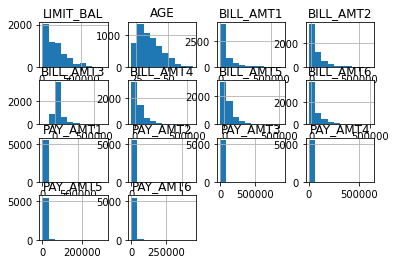

In [69]:
df[num].hist()

In [70]:
len(df) / dim_antes

1.0

## Ingeniería de variables

### Numéricas

In [71]:
## Promedio de todos los montos de pago
df['Prom_monto'] = df[monto].mean(axis = 1)
num += ['Prom_monto']
df['Prom_monto'].describe()

count      5625.000000
mean      45191.350252
std       64282.868301
min       -7081.166667
25%        4580.500000
50%       20064.500000
75%       56411.500000
max      548854.333333
Name: Prom_monto, dtype: float64

In [72]:
## Promedio de todos los pagos de pago
df['Prom_pago'] = df[pago].mean(axis = 1)
num += ['Prom_pago']
df['Prom_pago'].describe()

count      5625.000000
mean       5328.803081
std       12037.570814
min           0.000000
25%        1092.333333
50%        2321.666667
75%        5500.000000
max      627344.333333
Name: Prom_pago, dtype: float64

<AxesSubplot:>

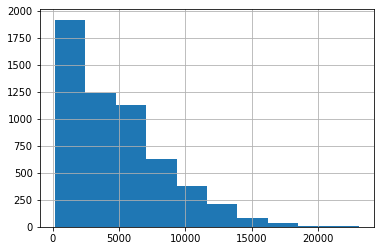

In [73]:
for x in monto:
    df[f'Lim_{x}'] = df[x] / df['LIMIT_BAL']

df['Lim_edad'] = df['LIMIT_BAL'] / df['AGE']

lim = [col for col in df.columns if col.startswith('Lim')]
num += lim

df['Lim_edad'].hist()

In [74]:
## Dimensión hasta ahora
df.shape

(5625, 33)

In [75]:
df.reset_index(drop = True, inplace = True)

### Categóricas

In [76]:
for col in estatus:
    aux = []
    for i in range(len(df)):
        if int(df[col][i]) >= 1:
            aux.append('>=1')
        else:
            aux.append(df[col][i])
    df[col] = aux

for col in estatus:
    display(df[col].value_counts(1).reset_index().sort_values(by = 'index'))

,index,PAY_1
2,-1,0.188978
3,-2,0.093156
0,0,0.494400
1,>=1,0.223467


,index,PAY_2
1,-1,0.200533
3,-2,0.125689
0,0,0.526933
2,>=1,0.146844


,index,PAY_3
1,-1,0.200356
3,-2,0.134578
0,0,0.527822
2,>=1,0.137244


,index,PAY_4
1,-1,0.191289
2,-2,0.142933
0,0,0.552178
3,>=1,0.113600


,index,PAY_5
1,-1,0.181689
2,-2,0.150933
0,0,0.573156
3,>=1,0.094222


,index,PAY_6
1,-1,0.189156
2,-2,0.164444
0,0,0.542044
3,>=1,0.104356


In [77]:
## Monto negativo/cero o pago igual a cero?
tipo = []
for col in monto + pago:
    aux = []
    for x in df[col]:
        if int(x) <= 0:
            aux.append('<=0')
        else:
            aux.append('>0')
    df[f'{col}_tipo'] = aux
    tipo += [f'{col}_tipo']

for x in tipo:
    display(df[x].value_counts(1).reset_index())

,index,BILL_AMT1_tipo
0,>0,0.914489
1,<=0,0.085511


,index,BILL_AMT2_tipo
0,>0,0.894222
1,<=0,0.105778


,index,BILL_AMT3_tipo
0,>0,0.886222
1,<=0,0.113778


,index,BILL_AMT4_tipo
0,>0,0.870044
1,<=0,0.129956


,index,BILL_AMT5_tipo
0,>0,0.862933
1,<=0,0.137067


,index,BILL_AMT6_tipo
0,>0,0.843378
1,<=0,0.156622


,index,PAY_AMT1_tipo
0,>0,0.824711
1,<=0,0.175289


,index,PAY_AMT2_tipo
0,>0,0.823111
1,<=0,0.176889


,index,PAY_AMT3_tipo
0,>0,0.796622
1,<=0,0.203378


,index,PAY_AMT4_tipo
0,>0,0.791467
1,<=0,0.208533


,index,PAY_AMT5_tipo
0,>0,0.769244
1,<=0,0.230756


,index,PAY_AMT6_tipo
0,>0,0.761956
1,<=0,0.238044


In [78]:
for col in cat[:3]:
    df[col] = df[col].astype(int)
    df[col] = df[col].astype(str)
df[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SEX        5625 non-null   object
 1   EDUCATION  5625 non-null   object
 2   MARRIAGE   5625 non-null   object
 3   PAY_1      5625 non-null   object
 4   PAY_2      5625 non-null   object
 5   PAY_3      5625 non-null   object
 6   PAY_4      5625 non-null   object
 7   PAY_5      5625 non-null   object
 8   PAY_6      5625 non-null   object
dtypes: object(9)
memory usage: 395.6+ KB


### Diccionarios

In [79]:
df['SEX'].replace({'1':'Hombre',
                   '2':'Mujer'},inplace = True)

df['EDUCATION'].replace({'1':'Preparatoria',
                         '2':'Universidad',
                         '3':'Secundaria', 
                         '4':'Otros'}, inplace = True)

df['MARRIAGE'].replace({'1':'Soltero',
                        '2':'Casado',
                        '3':'Otros'}, inplace = True)

for i in range(1,7):
    df[f'PAY_{i}'].replace({'-2':'No_uso',
                           '0':'Uso', 
                           '-1':'Pago_correcto', 
                           '>=1':'Pago_retrasado'}, inplace = True)

In [80]:
num = list(pd.DataFrame(df.describe()).columns)
tgt = ['incumple']
num = [x for x in num if x not in tgt]
cat = [col for col in df.columns if col not in num + tgt]
df = df[cat + num + tgt].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SEX             5625 non-null   object 
 1   EDUCATION       5625 non-null   object 
 2   MARRIAGE        5625 non-null   object 
 3   PAY_1           5625 non-null   object 
 4   PAY_2           5625 non-null   object 
 5   PAY_3           5625 non-null   object 
 6   PAY_4           5625 non-null   object 
 7   PAY_5           5625 non-null   object 
 8   PAY_6           5625 non-null   object 
 9   BILL_AMT1_tipo  5625 non-null   object 
 10  BILL_AMT2_tipo  5625 non-null   object 
 11  BILL_AMT3_tipo  5625 non-null   object 
 12  BILL_AMT4_tipo  5625 non-null   object 
 13  BILL_AMT5_tipo  5625 non-null   object 
 14  BILL_AMT6_tipo  5625 non-null   object 
 15  PAY_AMT1_tipo   5625 non-null   object 
 16  PAY_AMT2_tipo   5625 non-null   object 
 17  PAY_AMT3_tipo   5625 non-null   o

## Modelaje

In [81]:
X = df.iloc[:,:-1].copy()
y = df[tgt]
y.mean()

incumple    0.218133
dtype: float64

In [82]:
X.shape

(5625, 44)

In [83]:
## Se separan los conjuntos de entrenamiento y prueba
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 22)
len(y_test) / len(y_train)

0.1112208613196365

In [84]:
## Se une la variable objetivo para proceder con IV/WOE
X = X_train.join(y_train)
y = y_train.copy()

### Reducción de dimensiones

In [85]:
## Se discretizan las variables numéricas, se vuelven rangos (por percentil)
for col in num:
    X[f'{col}_cut'] = pd.qcut(X[f'{col}'],
                               q = 6,
                              duplicates = 'drop').astype(str)
cut = [col for col in X.columns if col.endswith('_cut')]

## Se agrupan las variables a evaluar
variables = cat + cut

## Y se unen con la matriz X, junto con la  variable objetivo
X.columns

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1_tipo', 'BILL_AMT2_tipo', 'BILL_AMT3_tipo',
       'BILL_AMT4_tipo', 'BILL_AMT5_tipo', 'BILL_AMT6_tipo', 'PAY_AMT1_tipo',
       'PAY_AMT2_tipo', 'PAY_AMT3_tipo', 'PAY_AMT4_tipo', 'PAY_AMT5_tipo',
       'PAY_AMT6_tipo', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Prom_monto', 'Prom_pago', 'Lim_BILL_AMT1', 'Lim_BILL_AMT2',
       'Lim_BILL_AMT3', 'Lim_BILL_AMT4', 'Lim_BILL_AMT5', 'Lim_BILL_AMT6',
       'Lim_edad', 'incumple', 'LIMIT_BAL_cut', 'AGE_cut', 'BILL_AMT1_cut',
       'BILL_AMT2_cut', 'BILL_AMT3_cut', 'BILL_AMT4_cut', 'BILL_AMT5_cut',
       'BILL_AMT6_cut', 'PAY_AMT1_cut', 'PAY_AMT2_cut', 'PAY_AMT3_cut',
       'PAY_AMT4_cut', 'PAY_AMT5_cut', 'PAY_AMT6_cut', 'Prom_monto_cut',
       'Prom_pago_cut', 'Lim_BILL_AMT1_cut', '

In [86]:
## Se construye la función que enlista el IV (Info Value) por columna
# y además, la función puede crear las variables "woe-izadas"
def iv_woe(obj, df, var, woe = False):
    obj = obj #se instancia dentro de la función para que el siguiente bucle la tome en cuenta
    iv_fin = {} #se crea un diccionario vacío
    for x in var:
        aux = df[[x, obj]].copy() #nos interesa evaluar cada variable vs nuestra variable objetivo
        aux['n'] = 1 #columna de apoyo para hacer la suma

        ## Se transforma la estructura de la tabla:
        aux = aux.pivot_table(columns = obj, #teniendo las opciones de nuestra variable objetivo como columnas
                              index = x, #y las categorías (rangos para las numéricas) como renglones
                              values = 'n', #el contador por categoría vs resultado de la variable objetivo
                              aggfunc = 'sum',
                              fill_value = 0).copy() #llenar los vacíos con ceros

        aux['no_ev'] = aux[0] / aux[0].sum() #divide cada renglón entre el total para obtener la proba de no evento
        aux['si_ev'] = aux[1] / aux[1].sum() #proba de sí evento
        
        aux['woe'] = np.log(aux['no_ev'] / aux['si_ev']) #se crea la columna de WOE (Weight Of Evidence)
        aux['iv'] = aux['woe']*(aux['no_ev'] - aux['si_ev']) #se crea la columna individual de IV (Info Value)

        iv_fin[x] = aux['iv'].sum().round(3) #y finalmente, suma la columna y la agrega al diccionario

        if woe == True: ## crearemos nuevas columnas "woe-izadas"
            aux = aux[['woe']].reset_index().rename(columns={'woe': f'woe_{x}'})
            df = df.merge(aux, on = x, how = 'left')
        
    iv_fin = pd.DataFrame.from_dict(iv_fin,
                                    orient = 'index',
                                    columns = ['IV']).sort_values(by = 'IV', ## se ordenan descendentemente
                                                                  ascending = False)
    iv_fin = iv_fin[iv_fin['IV'] != np.inf].copy() ## Y se eliminan los infinitos
    
    return iv_fin, df

In [87]:
## Se aplica la función que evalúa todas las variables de un dataframe
resultado = iv_woe(obj = tgt[0],
                   df = X,
                   var = variables,
                   woe = True)

## DataFrame del IV por variable
iv = resultado[0].reset_index()
iv

,index,IV
0,PAY_1,0.645
1,PAY_2,0.485
2,PAY_3,0.427
3,PAY_4,0.401
4,PAY_5,0.333
5,PAY_6,0.287
6,Prom_pago_cut,0.186
7,Lim_edad_cut,0.180
8,LIMIT_BAL_cut,0.145
9,PAY_AMT1_cut,0.136


In [88]:
## Mejores variables con IV > 3%
ls_best = list(iv[iv['IV'] > .025]['index'])
ls_best

['PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'Prom_pago_cut',
 'Lim_edad_cut',
 'LIMIT_BAL_cut',
 'PAY_AMT1_cut',
 'Lim_BILL_AMT5_cut',
 'PAY_AMT3_cut',
 'PAY_AMT2_cut',
 'PAY_AMT1_tipo',
 'PAY_AMT3_tipo',
 'Lim_BILL_AMT6_cut',
 'PAY_AMT5_cut',
 'PAY_AMT6_cut',
 'Lim_BILL_AMT4_cut',
 'PAY_AMT4_cut',
 'PAY_AMT2_tipo',
 'Lim_BILL_AMT3_cut',
 'Lim_BILL_AMT2_cut',
 'Lim_BILL_AMT1_cut',
 'PAY_AMT5_tipo',
 'PAY_AMT4_tipo',
 'EDUCATION',
 'AGE_cut']

In [89]:
## Se agregan las variables woe-izadas
X = resultado[1].copy()

## Se eligen sólo las seleccionadas por IV
X = X[[f'woe_{x}' for x in X.columns if x in ls_best]]
ls_woe = [col for col in X.columns if col.startswith('woe_')]
X.sample()

,woe_EDUCATION,woe_PAY_1,woe_PAY_2,woe_PAY_3,woe_PAY_4,woe_PAY_5,woe_PAY_6,woe_PAY_AMT1_tipo,woe_PAY_AMT2_tipo,woe_PAY_AMT3_tipo,woe_PAY_AMT4_tipo,woe_PAY_AMT5_tipo,woe_LIMIT_BAL_cut,woe_AGE_cut,woe_PAY_AMT1_cut,woe_PAY_AMT2_cut,woe_PAY_AMT3_cut,woe_PAY_AMT4_cut,woe_PAY_AMT5_cut,woe_PAY_AMT6_cut,woe_Prom_pago_cut,woe_Lim_BILL_AMT1_cut,woe_Lim_BILL_AMT2_cut,woe_Lim_BILL_AMT3_cut,woe_Lim_BILL_AMT4_cut,woe_Lim_BILL_AMT5_cut,woe_Lim_BILL_AMT6_cut,woe_Lim_edad_cut
1583,-0.118627,-1.227277,-1.391497,-1.359256,-1.471842,-1.491655,-1.326559,0.172621,0.137904,-0.588292,0.116779,-0.377615,-0.092349,0.265975,0.710091,0.68642,-0.354915,0.454231,-0.304676,0.28852,0.476141,0.030962,0.002829,-0.221986,-0.133177,-0.019501,-0.046886,0.291894


### Entrenamiento

In [90]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight = 'balanced')
logreg.fit(X, y)
logreg_res = cross_val_score(estimator = logreg,
                             X = X,
                             y = y,
                             cv = 3,
                             n_jobs = -1,
                             scoring = "roc_auc")

np.mean(logreg_res), np.std(logreg_res)

/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(0.7581288680928746, 0.00952276100791585)

In [91]:
from sklearn.linear_model import SGDClassifier
sgdr = SGDClassifier()
sgdr.fit(X, y)
sgd_res = cross_val_score(estimator = sgdr,
                          X = X,
                          y = y,
                          cv = 3,
                          n_jobs = -1,
                          scoring = 'roc_auc')
np.mean(sgd_res), np.std(sgd_res)

/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(0.709305628273953, 0.03661083449246831)

### Hiperparametrización

In [92]:
param_grid_log = {"C": np.logspace(-7,7,70),
                  "l1_ratio": [x for x in range(10000)],
                  'max_iter':[100,1000,5000],
                  "penalty": ["l2", "l1", "elasticnet", "none"],
                  "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 }

from sklearn.model_selection import RandomizedSearchCV
logreg_h = RandomizedSearchCV(estimator = logreg,
                              n_jobs = -1,
                              scoring = 'roc_auc',
                              param_distributions = param_grid_log,
                              verbose = 5,
                              random_state = 22,
                              n_iter = 500,
                              cv = 3)
logreg_h.fit(X, y)
logreg_h.best_score_

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 594 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 1098 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   59.4s finished
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7652859690310668

In [93]:
import pickle

## Guardar modelo
with open('cs.pkl', 'wb') as file:
    pickle.dump(logreg, file)

## Abrir un modelo
with open('cs.pkl', 'rb') as file:
    cs = pickle.load(file)

## Listo para usarse
cs

LogisticRegression(class_weight='balanced')

In [94]:
import pickle

## Guardar modelo
with open('cspp.pkl', 'wb') as file:
    pickle.dump(logreg_h.best_estimator_, file)

## Abrir un modelo
with open('cspp.pkl', 'rb') as file:
    cspp = pickle.load(file)

## Listo para usarse
cspp

LogisticRegression(C=0.0018233480008684423, class_weight='balanced',
                   l1_ratio=9246, solver='saga')

In [95]:
## Y qcuánto mejora el SGD si hiper-parametrizamos
param_grid = {"loss": ["hinge", "log", "modified_huber", "squared_hinge", "perceptron"],
              "penalty": ["l2", "l1", "elasticnet"],
              "alpha": [x/100+0.01 for x in range(100)],
              "l1_ratio": [x/10 for x in range(10)],
              "learning_rate": ["constant", "optimal", "invscaling", "adaptive"],
              "eta0": [0.001]
             }
n_hyper = np.prod(list(map(len, param_grid.values())))
n_hyper

60000

model = SGDClassifier()
hyper = RandomizedSearchCV(estimator = model,
                           n_jobs = -1,
                           scoring = 'roc_auc',
                           param_distributions = param_grid,
                           error_score = -1000,
                           verbose = 5,
                           n_iter = 2000,
                           random_state = 0,
                           cv = 3)
hyper.fit(X, y)
hyper.best_score_

In [97]:
X.describe()

,woe_EDUCATION,woe_PAY_1,woe_PAY_2,woe_PAY_3,woe_PAY_4,woe_PAY_5,woe_PAY_6,woe_PAY_AMT1_tipo,woe_PAY_AMT2_tipo,woe_PAY_AMT3_tipo,woe_PAY_AMT4_tipo,woe_PAY_AMT5_tipo,woe_LIMIT_BAL_cut,woe_AGE_cut,woe_PAY_AMT1_cut,woe_PAY_AMT2_cut,woe_PAY_AMT3_cut,woe_PAY_AMT4_cut,woe_PAY_AMT5_cut,woe_PAY_AMT6_cut,woe_Prom_pago_cut,woe_Lim_BILL_AMT1_cut,woe_Lim_BILL_AMT2_cut,woe_Lim_BILL_AMT3_cut,woe_Lim_BILL_AMT4_cut,woe_Lim_BILL_AMT5_cut,woe_Lim_BILL_AMT6_cut,woe_Lim_edad_cut
count,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000
mean,0.013188,0.148603,0.097377,0.085158,0.075907,0.061597,0.056538,0.026909,0.018345,0.026347,0.011624,0.012929,0.041885,0.007478,0.040844,0.033827,0.032705,0.023557,0.030006,0.028093,0.056390,0.016415,0.017449,0.017900,0.024154,0.030276,0.026758,0.051512
std,0.220198,0.751705,0.630364,0.589414,0.567665,0.515507,0.482332,0.313165,0.257480,0.308791,0.203856,0.214865,0.386457,0.162813,0.382288,0.348060,0.340654,0.289032,0.326533,0.316274,0.448863,0.241230,0.248890,0.252355,0.294016,0.331399,0.311069,0.429887
min,-0.155160,-1.227277,-1.391497,-1.359256,-1.471842,-1.491655,-1.326559,-0.646016,-0.536047,-0.588292,-0.383497,-0.377615,-0.458664,-0.216112,-0.386601,-0.337443,-0.354915,-0.244253,-0.304676,-0.245055,-0.477772,-0.275485,-0.346829,-0.387435,-0.510845,-0.649877,-0.607778,-0.602085
25%,-0.118627,0.339472,0.281864,0.230869,0.191240,0.183769,0.170323,0.172621,0.137904,0.181451,0.116779,0.131117,-0.458664,-0.177577,-0.386601,-0.337443,-0.354915,-0.244253,-0.304676,-0.245055,-0.352674,-0.258891,-0.190719,-0.221986,-0.133177,-0.019501,-0.046886,-0.261607
50%,-0.118627,0.604253,0.410301,0.340618,0.250092,0.183769,0.170323,0.172621,0.137904,0.181451,0.116779,0.131117,-0.092349,0.015968,0.028512,-0.028676,-0.117131,-0.190196,-0.056763,-0.226502,-0.039386,-0.003794,-0.007576,0.077682,0.056810,0.100369,0.114715,-0.100108
75%,0.206164,0.604253,0.410301,0.340618,0.250092,0.183769,0.170679,0.172621,0.137904,0.181451,0.116779,0.131117,0.384352,0.102377,0.253276,0.175722,0.290047,0.409225,0.452052,0.288520,0.476141,0.308224,0.316668,0.194650,0.299828,0.274914,0.210377,0.294570
max,1.283511,0.691667,0.410301,0.344928,0.435151,0.424607,0.401724,0.172621,0.137904,0.181451,0.116779,0.131117,0.633055,0.265975,0.710091,0.686420,0.506180,0.454231,0.525609,0.595843,0.771616,0.332276,0.340866,0.366937,0.375731,0.375731,0.375731,0.713262


## Scorecard

In [35]:
pdo = 30
base_score = 134
base_odds = 100
factor = pdo/np.log(2)
offset = base_score - (factor - np.log(base_odds))
m = len(ls_woe)

alpha = hyper.best_estimator_.intercept_
betas = hyper.best_estimator_.coef_[0]

##Cómo afectan las mejores variables al modelo SGD hp?
pd.DataFrame(list(zip(ls_woe[4:], betas)),
            columns =['Variable', 'Impacto']).sort_values(by = 'Impacto')

In [36]:
alpha2 = logreg.intercept_
betas2 = logreg.coef_[0]

## Cómo afectan las mejores variables al modelo Log hp?
pd.DataFrame(list(zip(ls_woe[4:], betas2)),
            columns =['Variable', 'Impacto']).sort_values(by = 'Impacto')

,Variable,Impacto
1,woe_PAY_5,-0.660896
0,woe_PAY_4,-0.538935
14,woe_PAY_AMT5_cut,-0.509660
9,woe_AGE_cut,-0.386758
22,woe_Lim_BILL_AMT6_cut,-0.377676
3,woe_PAY_AMT1_tipo,-0.329986
13,woe_PAY_AMT4_cut,-0.276810
18,woe_Lim_BILL_AMT2_cut,-0.247550
6,woe_PAY_AMT4_tipo,-0.244403
21,woe_Lim_BILL_AMT5_cut,-0.231680


In [37]:
X = resultado[1].copy()

In [38]:
for feat, beta in zip(ls_woe, betas2):
    X["P_" + feat[4:]] = X[feat].apply(lambda x:((-beta*x +
                                                    (alpha2/m))*factor) +
                                         (offset/m)).astype(int)
X["score"] = X[[x for x in X.columns if x.startswith("P_")]].sum(axis = 1)
X["score"].describe()

count    5062.000000
mean       95.391347
std        43.587561
min       -55.000000
25%        74.000000
50%       105.000000
75%       126.000000
max       198.000000
Name: score, dtype: float64

<AxesSubplot:>

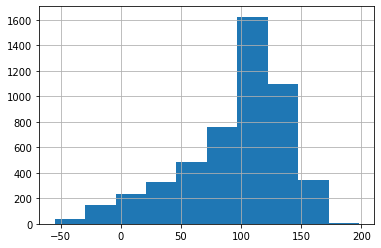

In [39]:
X["score"].hist()

In [40]:
for var in ls_best:
    display(X[[var, "P_" + var]].groupby(var).mean())

,P_PAY_1
PAY_1,
No_uso,23
Pago_correcto,13
Pago_retrasado,-31
Uso,20


,P_PAY_2
PAY_2,
No_uso,3
Pago_correcto,3
Pago_retrasado,2
Uso,3


,P_PAY_3
PAY_3,
No_uso,6
Pago_correcto,8
Pago_retrasado,-15
Uso,8


,P_PAY_4
PAY_4,
No_uso,5
Pago_correcto,7
Pago_retrasado,-9
Uso,5


,P_PAY_5
PAY_5,
No_uso,4
Pago_correcto,6
Pago_retrasado,-7
Uso,4


,P_PAY_6
PAY_6,
No_uso,5
Pago_correcto,7
Pago_retrasado,-10
Uso,5


,P_Prom_pago_cut
Prom_pago_cut,
"(-0.001, 765.25]",1
"(1393.833, 2292.917]",2
"(2292.917, 4154.667]",3
"(4154.667, 7834.75]",5
"(765.25, 1393.833]",1
"(7834.75, 627344.333]",7


,P_Lim_edad_cut
Lim_edad_cut,
"(1250.0, 2352.941]",-2
"(172.41299999999998, 1250.0]",-10
"(2352.941, 4000.0]",1
"(4000.0, 5806.452]",10
"(5806.452, 8333.333]",10
"(8333.333, 23103.448]",19


,P_LIMIT_BAL_cut
LIMIT_BAL_cut,
"(140000.0, 200000.0]",-1
"(200000.0, 300000.0]",-6
"(300000.0, 800000.0]",-12
"(50000.0, 80000.0]",8
"(80000.0, 140000.0]",5
"(9999.999, 50000.0]",14


,P_PAY_AMT1_cut
PAY_AMT1_cut,
"(-0.001, 1400.0]",-5
"(1400.0, 2038.5]",1
"(2038.5, 3732.0]",6
"(3732.0, 7000.0]",9
"(7000.0, 873552.0]",19


,P_Lim_BILL_AMT5_cut
Lim_BILL_AMT5_cut,
"(-0.362, 0.00193]",4
"(0.00193, 0.0343]",9
"(0.0343, 0.216]",11
"(0.216, 0.467]",6
"(0.467, 0.754]",3
"(0.754, 4.926]",-10


,P_PAY_AMT3_cut
PAY_AMT3_cut,
"(-0.001, 1000.0]",1
"(1000.0, 1690.0]",2
"(1690.0, 3003.0]",5
"(3003.0, 6288.5]",5
"(6288.5, 889043.0]",6


,P_PAY_AMT2_cut
PAY_AMT2_cut,
"(-0.001, 1300.0]",1
"(1300.0, 2000.0]",3
"(2000.0, 3567.0]",3
"(3567.0, 7000.0]",4
"(7000.0, 1215471.0]",7


,P_PAY_AMT1_tipo
PAY_AMT1_tipo,
<=0,10
>0,1


,P_PAY_AMT3_tipo
PAY_AMT3_tipo,
<=0,-6
>0,6


,P_Lim_BILL_AMT6_cut
Lim_BILL_AMT6_cut,
"(-0.581, 0.000866]",3
"(0.000866, 0.0265]",4
"(0.0265, 0.188]",4
"(0.188, 0.44]",3
"(0.44, 0.737]",3
"(0.737, 3.886]",0


,P_PAY_AMT5_cut
PAY_AMT5_cut,
"(-0.001, 629.0]",0
"(1484.0, 3000.0]",3
"(3000.0, 5692.5]",8
"(5692.5, 317077.0]",9
"(629.0, 1484.0]",2


,P_PAY_AMT6_cut
PAY_AMT6_cut,
"(-0.001, 616.0]",1
"(1500.0, 3000.0]",3
"(3000.0, 5601.5]",5
"(5601.5, 443001.0]",7
"(616.0, 1500.0]",1


,P_Lim_BILL_AMT4_cut
Lim_BILL_AMT4_cut,
"(-1.375, 0.00288]",3
"(0.00288, 0.0458]",0
"(0.0458, 0.242]",-1
"(0.242, 0.517]",1
"(0.517, 0.829]",5
"(0.829, 5.147]",10


,P_PAY_AMT4_cut
PAY_AMT4_cut,
"(-0.001, 697.0]",2
"(1500.0, 3000.0]",3
"(3000.0, 5500.0]",4
"(5500.0, 621000.0]",4
"(697.0, 1500.0]",2


,P_PAY_AMT2_tipo
PAY_AMT2_tipo,
<=0,8
>0,2


,P_Lim_BILL_AMT3_cut
Lim_BILL_AMT3_cut,
"(-1.0259999999999998, 0.00386]",4
"(0.00386, 0.0498]",4
"(0.0498, 0.276]",6
"(0.276, 0.585]",4
"(0.585, 0.896]",1
"(0.896, 5.391]",0


,P_Lim_BILL_AMT2_cut
Lim_BILL_AMT2_cut,
"(-0.147, 0.00428]",3
"(0.00428, 0.0526]",8
"(0.0526, 0.299]",8
"(0.299, 0.642]",3
"(0.642, 0.921]",0
"(0.921, 6.38]",-2


,P_Lim_BILL_AMT1_cut
Lim_BILL_AMT1_cut,
"(-0.0382, 0.00683]",3
"(0.00683, 0.0613]",6
"(0.0613, 0.317]",6
"(0.317, 0.667]",3
"(0.667, 0.933]",0
"(0.933, 6.455]",0


,P_PAY_AMT5_tipo
PAY_AMT5_tipo,
<=0,6
>0,2


,P_PAY_AMT4_tipo
PAY_AMT4_tipo,
<=0,4
>0,2


,P_EDUCATION
EDUCATION,
Otros,33
Preparatoria,8
Secundaria,0
Universidad,0


,P_AGE_cut
AGE_cut,
"(20.999, 26.0]",0
"(26.0, 30.0]",4
"(30.0, 34.0]",6
"(34.0, 38.0]",3
"(38.0, 45.0]",3
"(45.0, 70.0]",1
